In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.ndimage as ndimage
import scipy.ndimage as nd
import scipy.interpolate as interpolate
import seaborn as sns
from matplotlib import rcParams
import math
import pandas as pd
from scipy import stats
%matplotlib inline

In [2]:
rcParams['font.sans-serif'] = ['Arial'] 
rcParams['font.size'] = 6 
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

rcParams['axes.linewidth'] = 0.5
rcParams['lines.linewidth'] = 0.5
rcParams['lines.markersize'] = 2.5
rcParams['lines.markeredgewidth'] = 0.0

rcParams['xtick.major.width'] = 0.5
rcParams['ytick.major.width'] = 0.5

to_inch = 0.393701
fwidth_cm = 10 
fheight_cm = 10. # cm
spwidth_cm = 1.5
spheight_cm = 3.
w = spwidth_cm/fwidth_cm
h = spheight_cm/fheight_cm
fwidth_inch = fwidth_cm * to_inch
fheight_inch = fheight_cm * to_inch

cmap = plt.cm.magma

lw_scatter = 0.4
ticks_fontsize = 6. 
spines_thickness = 0.5
ticks_width = spines_thickness
s_scatter = 8  # 10
lw_hlines = 1.0
lw_stats_bar = 0.6
lw_scatter = 0.2
alpha_scatter = 0.6
width_bars = 1.5
tick_length = 3.
markersize_rasterdots = 1.5 
fs = 6. 
lw = 0.3 
# colors
color_mpw = np.array([242,101,34])/255
color_su = [0.3,0.3,0.3] 
color_EXC = 'dimgray' 
color_INH = np.array([62,185,236.])/255  
    
despine_offset = 2

In [3]:
data_dir = '/.../Data/' 

In [5]:
# panel 1 E/F 
exp_name = '2022-01-13_15-41-02' 
selected_clusters = [255, 643, 641]
RGCs = [0, 0, 1]
cl_labels = ['EXC', 'INH', 'RGC']
colors_array = [color_EXC, color_INH, color_mpw]

Fig2_Data = np.load(data_dir + 'Fig2_Data.npy', encoding='latin1', allow_pickle=True).item()
Efficacy = Fig2_Data['Efficacy'] 
Distances = Fig2_Data['Distances'] 
mean_FR = Fig2_Data['mean_FR'] 

def cohen_d(x,y):
    return (np.mean(x) - np.mean(y)) / np.sqrt((np.std(x, ddof=1) ** 2 + np.std(y, ddof=1) ** 2) / 2.0)

## Plot Panel 2 D

EvsI p:: 0.033
Cohens d: 0.092


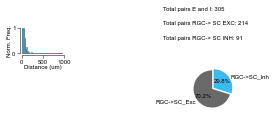

In [11]:
# Distance Distribution
distances_pooled_EXC = Distances['EXC'] 
distances_pooled_INH = Distances['INH']

n_pairs_INH = len(distances_pooled_INH)
n_pairs_EXC = len(distances_pooled_EXC)

labels = ['RGC->SC_Exc', 'RGC->SC_Inh']
sizes_pairs = [n_pairs_EXC, n_pairs_INH]
explode = [0.05]*len(sizes_pairs) 
colors = [color_EXC, color_INH]

inh = len(distances_pooled_INH)*['INH']
exc = len(distances_pooled_EXC)*['EXC']
cell_types = inh + exc

distances =  list(distances_pooled_INH) + list(distances_pooled_EXC)

fig = plt.figure(1)
plt.clf()
fig.set_size_inches(fwidth_inch,fheight_inch)
# Pie Chart
ax2 = plt.axes([0.7,0.6,0.15,0.15])
ax2.pie(sizes_pairs, explode=explode, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 6},
        colors = colors, shadow=False, startangle=90)
ax2.axis('equal')  


fig.text(0.6, 0.95, 'Total pairs E and I: %s'%(n_pairs_EXC + n_pairs_INH))
fig.text(0.6, 0.9, 'Total pairs RGC-> SC EXC: %s'%(n_pairs_EXC))
fig.text(0.6, 0.85, 'Total pairs RGC-> SC INH: %s'%(n_pairs_INH))

plt.tick_params('both',pad=1)

# stats 
stats_EvsI, p_EvsI_all = stats.ranksums(distances_pooled_EXC, distances_pooled_INH)
print(f"EvsI p:: {p_EvsI_all:.3f}")

quartiles = [0.25,0.5,0.75]
Q1_dist_exc, median_dist_exc, Q3_dist_exc = np.quantile(distances_pooled_EXC, quartiles)
Q1_dist_exc = np.round(Q1_dist_exc,2)
Q3_dist_exc = np.round(Q3_dist_exc,2)
median_dist_exc = np.round(median_dist_exc,2)

Q1_dist_inh, median_dist_inh, Q3_dist_inh = np.quantile(distances_pooled_INH, quartiles)
Q1_dist_inh = np.round(Q1_dist_inh,2)
Q3_dist_inh = np.round(Q3_dist_inh,2)
median_dist_inh = np.round(median_dist_inh,2)

cohen_d_Distance = cohen_d(distances_pooled_INH, distances_pooled_EXC)
print(f"Cohens d: {cohen_d_Distance:.3f}")

hs_range = np.arange(0,1000,20)
hs_EXC = np.histogram(distances_pooled_EXC,hs_range)
hs_INH = np.histogram(distances_pooled_INH,hs_range)
hs_EXC = hs_EXC[0] / hs_EXC[0].max()
hs_INH = hs_INH[0] / hs_INH[0].max()

x_lim =  [0,1000] #  [0, 500]  #[0,500]
x_ticks = np.arange(0, x_lim[1]+1, 500)
# Distance distribution
ax = plt.axes([0.1,0.8,0.15,0.09])
ax.tick_params(length=tick_length)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.fill_between(hs_range[0:-1],hs_INH,step='mid',alpha=0.9,fc=color_INH,ec=color_INH,joinstyle='miter')
ax.fill_between(hs_range[0:-1],hs_EXC,step='mid',alpha=0.6,fc=color_EXC,ec=color_EXC,joinstyle='miter')
ax.step(hs_range[0:-1],hs_INH, where='mid',alpha=0.9, color=color_INH)
ax.step(hs_range[0:-1],hs_EXC, where='mid', alpha=0.6, color=color_EXC)

plt.yticks([0,1])
plt.ylim([0,1.])
plt.xlabel('Distance (um)',labelpad=0)
plt.ylabel('Norm. Freq.',labelpad=0)
plt.tick_params('both',pad=1)
plt.xlim(x_lim)
plt.xticks(x_ticks)

sns.despine(ax=ax, offset=2, trim=True)

## Plot panel 2 F

p value: 0.053


Text(1, 90.0, '0.05344007623737609')

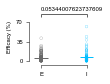

In [8]:
# Figure 2F) Efficacy
efficacy_exc = Efficacy['EXC'] 
efficacy_inh = Efficacy['INH']

efficacies = list(efficacy_inh) + list(efficacy_exc)

all_efficacies_Exc_list = list(efficacy_exc)
all_efficacies_Inh_list = list(efficacy_inh)

aa = np.ones(len(all_efficacies_Exc_list))*1 
bb = np.ones(len(all_efficacies_Inh_list))*3
cc = np.ones(len(all_efficacies_Inh_list))*2

stats_tmp_EFF = stats.ranksums(efficacy_exc, efficacy_inh)
print(f'p value: {stats_tmp_EFF[1]:.3f}')

quartiles = [0.25,0.5,0.75]
Q1_eff_exc, median_eff_exc, Q3_eff_exc = np.quantile(efficacy_exc, quartiles)
Q1_eff_exc = np.round(Q1_eff_exc,2)
Q3_eff_exc = np.round(Q3_eff_exc,2)
median_eff_exc = np.round(median_eff_exc,2)

Q1_eff_inh, median_eff_inh, Q3_eff_inh = np.quantile(efficacy_inh, quartiles)
Q1_eff_inh = np.round(Q1_eff_inh,2)
Q3_eff_inh = np.round(Q3_eff_inh,2)
median_eff_inh = np.round(median_eff_inh,2)

cohen_d_Efficacy = cohen_d(efficacy_inh, efficacy_exc)

ylim_percentage = 90.

ax1 = plt.axes([0.1,0.1, 0.15, 0.18])
ax1.tick_params(length=tick_length)
ax1.tick_params(labelsize=ticks_fontsize)  # ticks size font

plt.scatter(aa, np.array(all_efficacies_Exc_list),  s=8, facecolors='none', edgecolors='dimgray', linewidths=lw_scatter) #
plt.scatter(bb, np.array(all_efficacies_Inh_list),  s=8, facecolors='none', edgecolors='deepskyblue', linewidths=lw_scatter) 

positions_x = [1, 3]
labels_x = ['E',  'I']
ax1.hlines(y=np.mean(all_efficacies_Exc_list), xmin=0.7, xmax=1.3, linewidth=lw_hlines, color='dimgray')
ax1.hlines(y=np.mean(all_efficacies_Inh_list), xmin=2.7, xmax=3.3, linewidth=lw_hlines, color='deepskyblue')
ax1.set_yticks([0,35,70])

ax1.set_ylabel('Efficacy (%)') 
ax1.set_xticks(positions_x )  
ax1.set_xticklabels(labels_x, fontsize=2)
sns.despine(offset=despine_offset , trim=True) 

ax1.hlines(y=ylim_percentage-5, xmin=1., xmax=3., linewidth=lw_stats_bar, color='k')
ax1.vlines(x=1, ymin=ylim_percentage-10, ymax=ylim_percentage-5, linewidth=lw_stats_bar, color='k')  
ax1.vlines(x=3, ymin=ylim_percentage-10, ymax=ylim_percentage-5, linewidth=lw_stats_bar, color='k') 
ax1.text(1, ylim_percentage, str(stats_tmp_EFF[1])) 

## Plot Panel 2 F cumulative distribution

Text(0.01, 0.53, 'Median Efficacy INHs: 4.54, Q1: 2.2, Q3: 7.96 ')

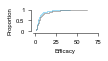

In [12]:
# 2F) Efficacy cumulative Dist 

ax_Eff = plt.axes([0.1,0.4, 0.15, 0.075])

ax_Eff.tick_params(length=tick_length)
ax_Eff.spines['right'].set_visible(False)
ax_Eff.spines['top'].set_visible(False)

df_Efficacy = pd.DataFrame()
df_Efficacy['Efficacy']  = efficacies
df_Efficacy['cell_types']  = cell_types

sns.ecdfplot(data=df_Efficacy, x="Efficacy", hue="cell_types", stat = 'proportion' ,  palette=colors, legend=False)

x_labels_eff = [0, 25,50, 75]
x_positions_eff = [0, 25,50, 75]
y_labels = [0, 0.5, 1]
y_positions =  [0, 0.5, 1]

mark = 0.5
 
ax_Eff.set_yticks(y_positions)
ax_Eff.set_yticklabels(y_labels)

ax_Eff.hlines(y= mark, xmin= median_eff_exc, xmax=median_eff_inh, linewidth=lw, linestyles='dashed', color='k')
sns.despine(ax= ax_Eff, offset=despine_offset , trim=False)

ax_Eff.set_xticks(x_positions_eff)
ax_Eff.set_xticklabels(x_labels_eff)

fig.text(0.01, 0.56, 'Median Efficacy EXCs: %s, Q1: %s, Q3: %s '%(median_eff_exc, Q1_eff_exc, Q3_eff_exc))
fig.text(0.01, 0.53, 'Median Efficacy INHs: %s, Q1: %s, Q3: %s '%(median_eff_inh, Q1_eff_inh, Q3_eff_inh))

## Panel 2 G

Text(0.5, 0.3, 'stas.linregress INH r 0.43543 | p 0.00002')

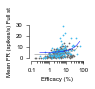

In [13]:
mean_FR_exc = mean_FR['EXC'] 
mean_FR_inh = mean_FR['INH']

x_EXC = efficacy_exc 
y_EXC = mean_FR_exc

x_INH = efficacy_inh 
y_INH = mean_FR_inh

s_scatter = 0.5

x_lim = [0, 100]
y_lim = [-1, 30]

x_lim_log = [0.1, 100]
x_ticks_log = [0.1, 1, 10, 100]
ax_corr_combined_fullST = plt.axes([0.8,0.1,0.12, 0.12]) 
ax_corr_combined_fullST.tick_params(length=tick_length)
ax_corr_combined_fullST.spines['right'].set_visible(False)
ax_corr_combined_fullST.spines['top'].set_visible(False)
ax_corr_combined_fullST.tick_params(length=tick_length)
plt.scatter(x_EXC, y_EXC, s=s_scatter, color=color_EXC)

plt.plot(np.unique(x_EXC), np.poly1d(np.polyfit(x_EXC, y_EXC, 1))(np.unique(x_EXC)), color='gray')  # add line of best fit
plt.scatter(x_INH, y_INH, s=s_scatter,color=color_INH)

plt.plot(np.unique(x_INH), np.poly1d(np.polyfit(x_INH, y_INH, 1))(np.unique(x_INH)), color='blue') 
ax_corr_combined_fullST.set_xlabel('Efficacy (%)')
ax_corr_combined_fullST.set_ylabel('Mean FR (spikes/s) Full st')

ax_corr_combined_fullST.set_xlim(x_lim_log)
ax_corr_combined_fullST.set_ylim(y_lim)
ax_corr_combined_fullST.set_xscale('log')
ax_corr_combined_fullST.set_xticks(x_ticks_log)
ax_corr_combined_fullST.set_xticklabels(x_ticks_log)
ax_corr_combined_fullST.set_yticks([0, 10, 20, 30])
ax_corr_combined_fullST.set_yticklabels([0, 10, 20, 30])

sns.despine(ax= ax_corr_combined_fullST, offset=despine_offset, trim=True)

slope, intercept, r_value_EXC_log, p_value_EXC_log, std_err = stats.linregress(np.log(x_EXC), y_EXC)
slope, intercept, r_value_INH_log, p_value_INH_log, std_err = stats.linregress(np.log(x_INH), y_INH)


fig.text(0.5, 0.35 , 'Correlation of LOG Efficacy vs Mean FR Full spiketrain')
fig.text(0.5, 0.32,'stas.linregress EXC r {:.5f} | p {:.5f}'.format(r_value_EXC_log, p_value_EXC_log) )
fig.text(0.5, 0.3,'stas.linregress INH r {:.5f} | p {:.5f}'.format(r_value_INH_log, p_value_INH_log) )

# Save figure 
#plt.savefig(data_dir + 'Figure2D_F_G' + '.pdf', dpi=200)

In [15]:
# Store as xlsx
inh = len(distances_pooled_INH)*['INH']
exc = len(distances_pooled_EXC)*['EXC']
cell_types = inh + exc

distances =  list(distances_pooled_INH) + list(distances_pooled_EXC)
efficacies = list(efficacy_inh) + list(efficacy_exc)
mean_FRs =  list(mean_FR_inh) + list(mean_FR_exc)

df_Fig2 = pd.DataFrame()
df_Fig2['cell_types']  = cell_types
df_Fig2['Distance']  = distances
df_Fig2['Efficacy']  = efficacies
df_Fig2['MeanFR']  = mean_FRs
df_Fig2

sheet_name = 'fig2'
file_name = data_dir + 'data_source_fig2.xlsx' 
with pd.ExcelWriter(file_name) as writer:
    df_Fig2.to_excel(writer, sheet_name=sheet_name,startcol=0)